In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

print(tf.test.gpu_device_name())

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ["E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00075-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00076-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00077-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00078-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00079-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]#,"E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00080-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00081-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00082-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00083-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00084-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00085-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00086-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00087-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00088-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00089-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00090-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00091-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00092-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00093-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00094-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00095-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00096-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00097-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00098-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00099-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined_file.csv'
combined_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined_file.csv\part-00000-b7a8f6a4-c6d0-42de-ba53-c3afbb8aae56-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,35.447879,2277933.0,6.00,180.40,63.701574,63.701574,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,104.6,2258.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,11943.60,54.0,3302.0,779.538342,934.926518,527.6,1.668624e+08,13.5,39.497795,1324.196488,886205.519378,1.00,244.60,DNS_Spoofing
1,0.000000,54.0,6.00,64.00,14.507528,14.507528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.0,8.303338e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
2,0.000000,0.0,1.00,64.00,122.270850,122.270850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.0,42.000000,0.000000,42.0,8.312463e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.000000,54.0,6.00,64.00,26.048423,26.048423,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.0,8.334411e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
4,0.000000,54.0,6.00,64.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.0,8.307238e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212692,0.000000,0.0,1.00,64.00,75.706042,75.706042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.0,42.000000,0.000000,42.0,8.312888e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2212693,0.214024,20339.5,17.00,64.00,264236.125995,264236.125995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.0,50.000000,0.000000,50.0,8.309855e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
2212694,4.190567,108.0,6.00,64.00,0.477262,0.477262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.0,8.294734e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
2212695,0.000000,53.4,5.99,62.64,0.888952,0.888952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,575.82,54.0,61.2,54.760072,1.978185,54.6,8.294639e+07,9.5,10.463788,2.801098,26.839384,0.15,141.55,DoS-TCP_Flood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            341108
DDoS-UDP_Flood             255950
DDoS-TCP_Flood             212887
DDoS-PSHACK_Flood          194030
DDoS-SYN_Flood             191969
DDoS-RSTFINFlood           191936
DDoS-SynonymousIP_Flood    170756
DoS-UDP_Flood              157753
DoS-TCP_Flood              126879
DoS-SYN_Flood               96162
BenignTraffic               52307
Mirai-greeth_flood          47030
Mirai-udpplain              42381
Mirai-greip_flood           35650
DDoS-ICMP_Fragmentation     21575
MITM-ArpSpoofing            14427
DDoS-UDP_Fragmentation      13674
DDoS-ACK_Fragmentation      13540
DNS_Spoofing                 8450
Recon-HostDiscovery          6279
Recon-OSScan                 4775
Recon-PortScan               3700
DoS-HTTP_Flood               3387
VulnerabilityScan            1752
DDoS-HTTP_Flood              1376
DDoS-SlowLoris               1114
DictionaryBruteForce          594
SqlInjection                  268
CommandInjection              265
BrowserHijacki

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

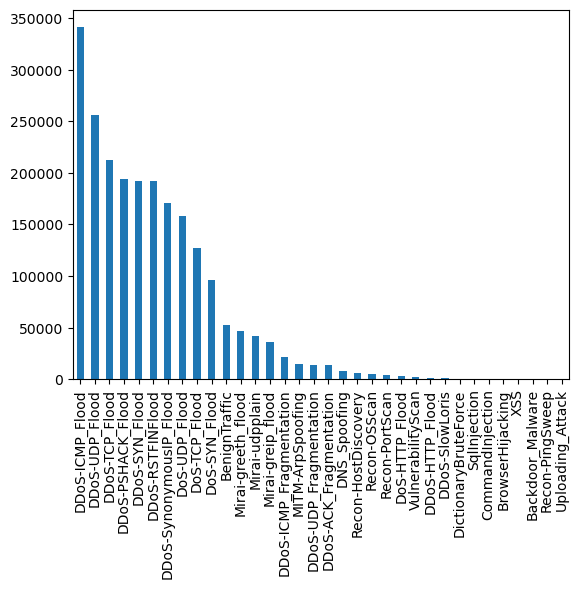

In [6]:
bar_graph('label')

In [7]:
df['label'].unique()

array(['DNS_Spoofing', 'DDoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DDoS-RSTFINFlood', 'DDoS-PSHACK_Flood', 'Mirai-udpplain',
       'Mirai-greeth_flood', 'DDoS-UDP_Flood', 'DoS-SYN_Flood',
       'DDoS-SYN_Flood', 'DDoS-SynonymousIP_Flood', 'DoS-TCP_Flood',
       'BenignTraffic', 'Mirai-greip_flood', 'DoS-UDP_Flood',
       'Recon-OSScan', 'DDoS-ICMP_Fragmentation',
       'DDoS-ACK_Fragmentation', 'Recon-PortScan',
       'DDoS-UDP_Fragmentation', 'MITM-ArpSpoofing',
       'Recon-HostDiscovery', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'DictionaryBruteForce', 'DoS-HTTP_Flood', 'BrowserHijacking',
       'XSS', 'SqlInjection', 'DDoS-HTTP_Flood', 'CommandInjection',
       'Backdoor_Malware', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

In [8]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,35.447879,2277933.0,6.00,180.40,63.701574,63.701574,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,104.6,2258.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,11943.60,54.0,3302.0,779.538342,934.926518,527.6,1.668624e+08,13.5,39.497795,1324.196488,886205.519378,1.00,244.60,16
1,0.000000,54.0,6.00,64.00,14.507528,14.507528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.0,8.303338e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,13
2,0.000000,0.0,1.00,64.00,122.270850,122.270850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.0,42.000000,0.000000,42.0,8.312463e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
3,0.000000,54.0,6.00,64.00,26.048423,26.048423,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.0,8.334411e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
4,0.000000,54.0,6.00,64.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.0,8.307238e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212692,0.000000,0.0,1.00,64.00,75.706042,75.706042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.0,42.000000,0.000000,42.0,8.312888e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
2212693,0.214024,20339.5,17.00,64.00,264236.125995,264236.125995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.0,50.000000,0.000000,50.0,8.309855e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
2212694,4.190567,108.0,6.00,64.00,0.477262,0.477262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.0,8.294734e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,20
2212695,0.000000,53.4,5.99,62.64,0.888952,0.888952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,575.82,54.0,61.2,54.760072,1.978185,54.6,8.294639e+07,9.5,10.463788,2.801098,26.839384,0.15,141.55,20


In [9]:
x=df.drop(columns=['label'])
y=df['label']

In [10]:
y

0          16
1          13
2           6
3           9
4          13
           ..
2212692     6
2212693    14
2212694    20
2212695    20
2212696    10
Name: label, Length: 2212697, dtype: int32

In [11]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 1770157
Testing set: 442540


In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.8011388801012338
precision: 0.8085490265023658
recall:  0.8011388801012338
f1:  0.7664995883325649


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.9938875581868306
precision: 0.9937402563039808
recall:  0.9938875581868306
f1:  0.9934533561966487


In [16]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.6679012066705835
precision: 0.66097774811646
recall:  0.6679012066705835
f1:  0.6070233820711586


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

accuracy 0.9858184255729189
precision:  0.9861669104580681
recall:  0.9858184255729189
f1: 0.9856663439882749


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# neural network

In [17]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [18]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1770157, 46)
(1770157, 34)
(442540, 46)
(442540, 34)


In [20]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [21]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [22]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
22099/22127 [============================>.] - ETA: 0s - loss: 0.2617 - accuracy: 0.8919
Epoch 1: val_accuracy improved from -inf to 0.96235, saving model to nn.hdf5
22127/22127 [==============================] - 40s 2ms/step - loss: 0.2615 - accuracy: 0.8920 - val_loss: 0.1038 - val_accuracy: 0.9623
Epoch 2/20
22110/22127 [============================>.] - ETA: 0s - loss: 0.0912 - accuracy: 0.9683
Epoch 2: val_accuracy improved from 0.96235 to 0.96992, saving model to nn.hdf5
22127/22127 [==============================] - 38s 2ms/step - loss: 0.0912 - accuracy: 0.9683 - val_loss: 0.0791 - val_accuracy: 0.9699
Epoch 3/20
22098/22127 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.9762
Epoch 3: val_accuracy improved from 0.96992 to 0.98176, saving model to nn.hdf5
22127/22127 [==============================] - 39s 2ms/step - loss: 0.0746 - accuracy: 0.9762 - val_loss: 0.0600 - val_accuracy: 0.9818
Epoch 4/20
22099/22127 [============================>.]

Text(0, 0.5, 'accuracy')

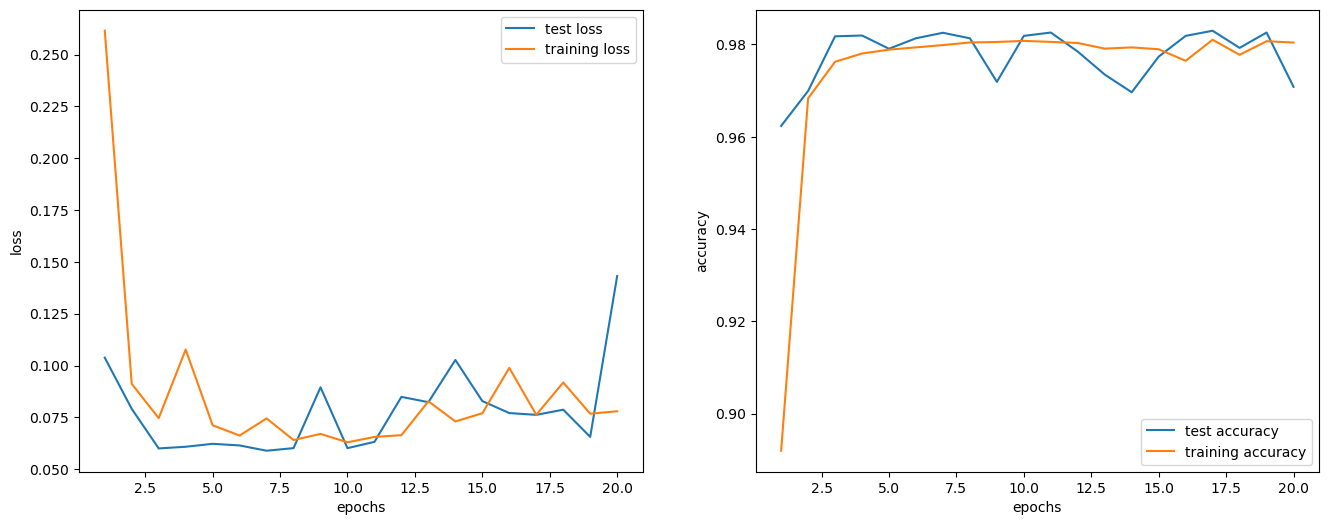

In [23]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [24]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

13830/13830 [==============================] - 12s 838us/step


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score:  0.9798022578627228
Recall score:  0.9828173724409093
F1 score:  0.9808561972315897
